In [8]:
import pandas as pd
data = pd.read_csv('sales_data.csv',
parse_dates = ['Date'])

In [10]:
data.head()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2013-11-26,26,November,2013,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
1,2015-11-26,26,November,2015,19,Youth (<25),M,Canada,British Columbia,Accessories,Bike Racks,Hitch Rack - 4-Bike,8,45,120,590,360,950
2,2014-03-23,23,March,2014,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,23,45,120,1366,1035,2401
3,2016-03-23,23,March,2016,49,Adults (35-64),M,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,20,45,120,1188,900,2088
4,2014-05-15,15,May,2014,47,Adults (35-64),F,Australia,New South Wales,Accessories,Bike Racks,Hitch Rack - 4-Bike,4,45,120,238,180,418


In [11]:
data['Customer_Age'].mean()

np.float64(35.91921157861212)

<Axes: ylabel='Density'>

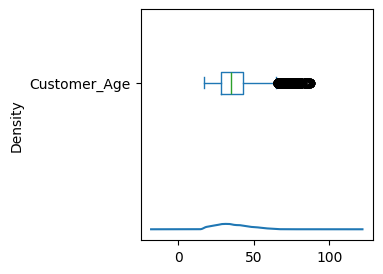

In [18]:
import matplotlib.pyplot as plt
data['Customer_Age'].plot(kind = 'kde',figsize=(3,3))
data['Customer_Age'].plot(kind = 'box',vert=False)

In [20]:
data['Order_Quantity'].mean()

np.float64(11.901659648253654)

<Axes: ylabel='Frequency'>

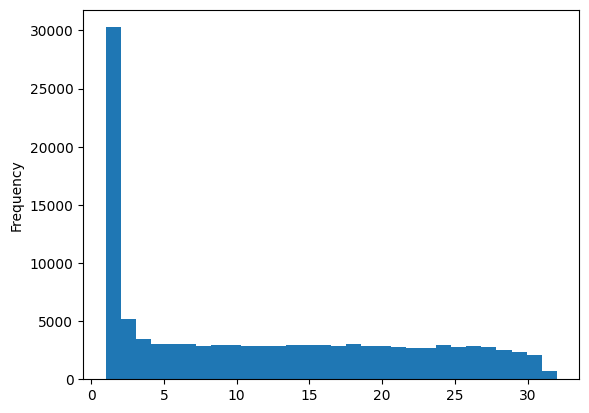

In [25]:
data['Order_Quantity'].plot(kind='hist',bins = 30)

<Axes: >

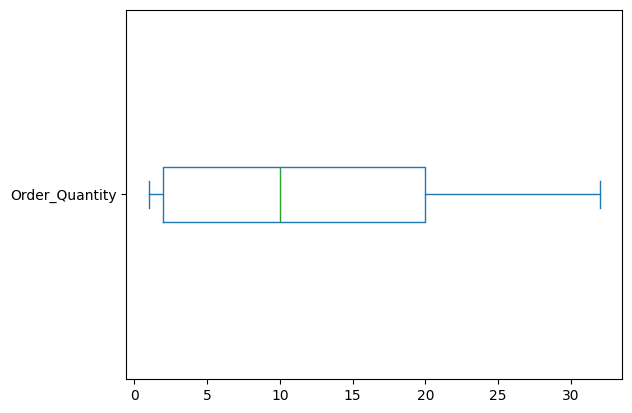

In [26]:
data['Order_Quantity'].plot(kind='box',vert=False)

In [29]:
data['Year'].value_counts()


Year
2016    29398
2014    29398
2015    24443
2013    24443
2012     2677
2011     2677
Name: count, dtype: int64

<Axes: ylabel='count'>

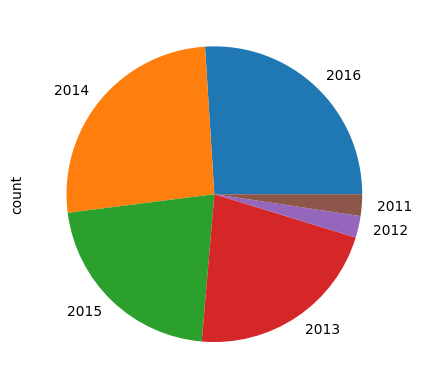

In [30]:
data['Year'].value_counts().plot(kind='pie')

In [31]:
data['Month'].value_counts()

Month
June         11234
December     11200
May          11128
April        10182
March         9674
January       9284
February      9022
October       8750
November      8734
August        8200
September     8166
July          7462
Name: count, dtype: int64

<Axes: ylabel='Frequency'>

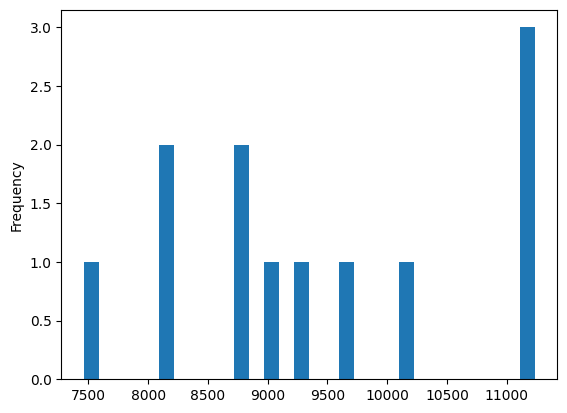

In [33]:
data['Month'].value_counts().plot(kind='hist',bins=30)

In [34]:
data['Country'].value_counts().head(1)

Country
United States    39206
Name: count, dtype: int64

In [36]:
data['Product'].unique()

array(['Hitch Rack - 4-Bike', 'All-Purpose Bike Stand',
       'Mountain Bottle Cage', 'Water Bottle - 30 oz.',
       'Road Bottle Cage', 'AWC Logo Cap', 'Bike Wash - Dissolver',
       'Fender Set - Mountain', 'Half-Finger Gloves, L',
       'Half-Finger Gloves, M', 'Half-Finger Gloves, S',
       'Sport-100 Helmet, Black', 'Sport-100 Helmet, Red',
       'Sport-100 Helmet, Blue', 'Hydration Pack - 70 oz.',
       'Short-Sleeve Classic Jersey, XL',
       'Short-Sleeve Classic Jersey, L', 'Short-Sleeve Classic Jersey, M',
       'Short-Sleeve Classic Jersey, S', 'Long-Sleeve Logo Jersey, M',
       'Long-Sleeve Logo Jersey, XL', 'Long-Sleeve Logo Jersey, L',
       'Long-Sleeve Logo Jersey, S', 'Mountain-100 Silver, 38',
       'Mountain-100 Silver, 44', 'Mountain-100 Black, 48',
       'Mountain-100 Silver, 48', 'Mountain-100 Black, 38',
       'Mountain-200 Silver, 38', 'Mountain-100 Black, 44',
       'Mountain-100 Silver, 42', 'Mountain-200 Black, 46',
       'Mountain-200 Silver

<Axes: ylabel='count'>

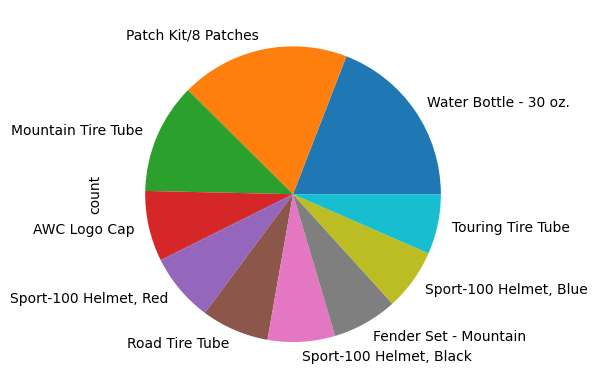

In [40]:
data['Product'].value_counts().head(10).plot(kind='pie')

<Axes: xlabel='Unit_Cost', ylabel='Unit_Price'>

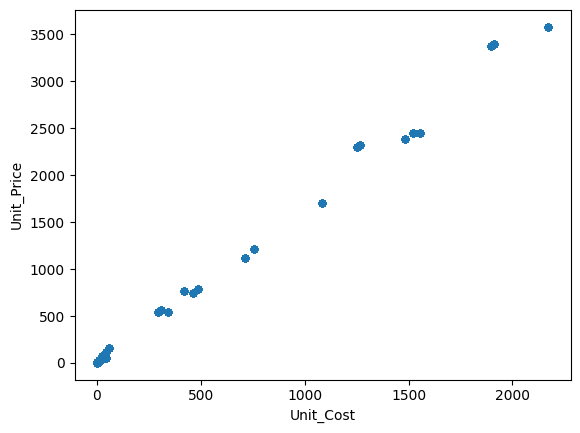

In [42]:
data.plot(kind='scatter',x='Unit_Cost',y='Unit_Price')

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

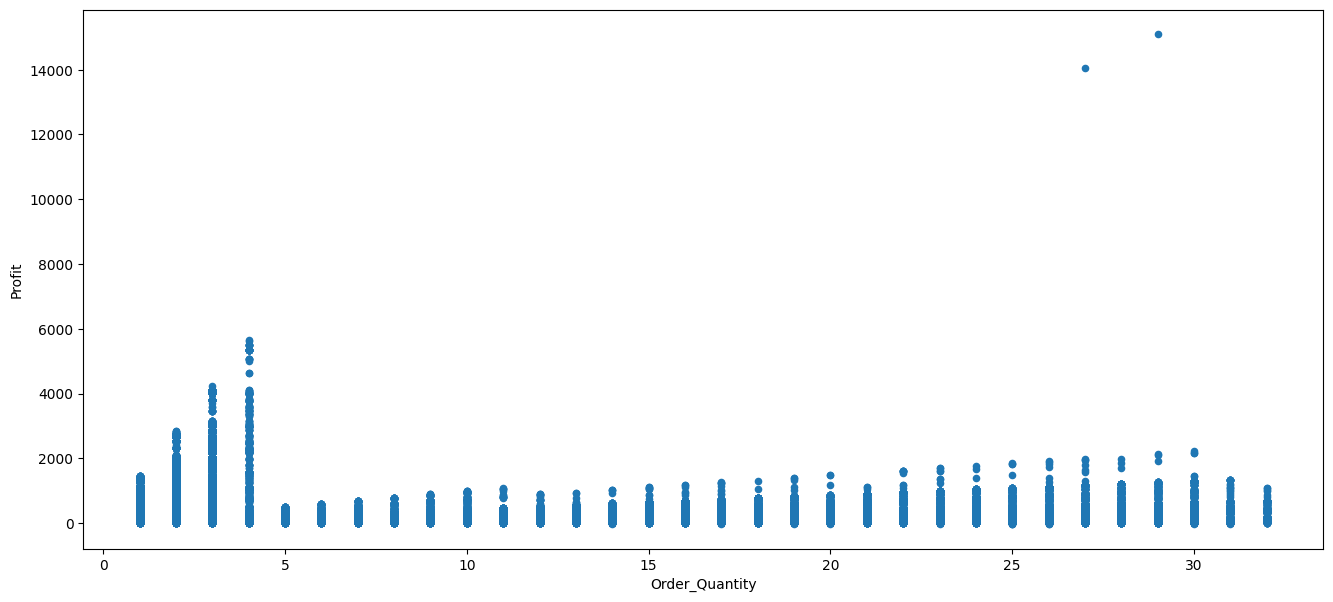

In [55]:
data.plot(kind='scatter',x='Order_Quantity',y='Profit',figsize=(16,7))

<Axes: title={'center': 'Profit'}, xlabel='[Country]'>

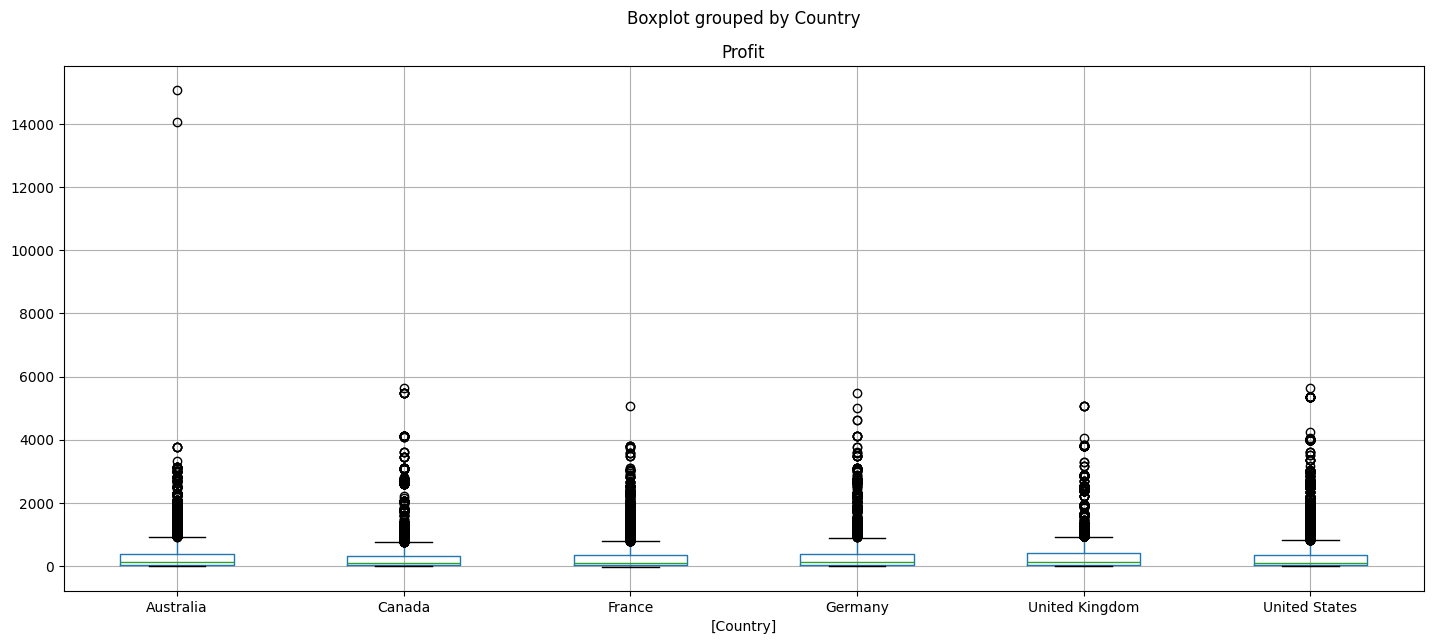

In [57]:
data[['Profit','Country']].boxplot(by='Country',figsize=(17,7))

<Axes: title={'center': 'Customer_Age'}, xlabel='[Country]'>

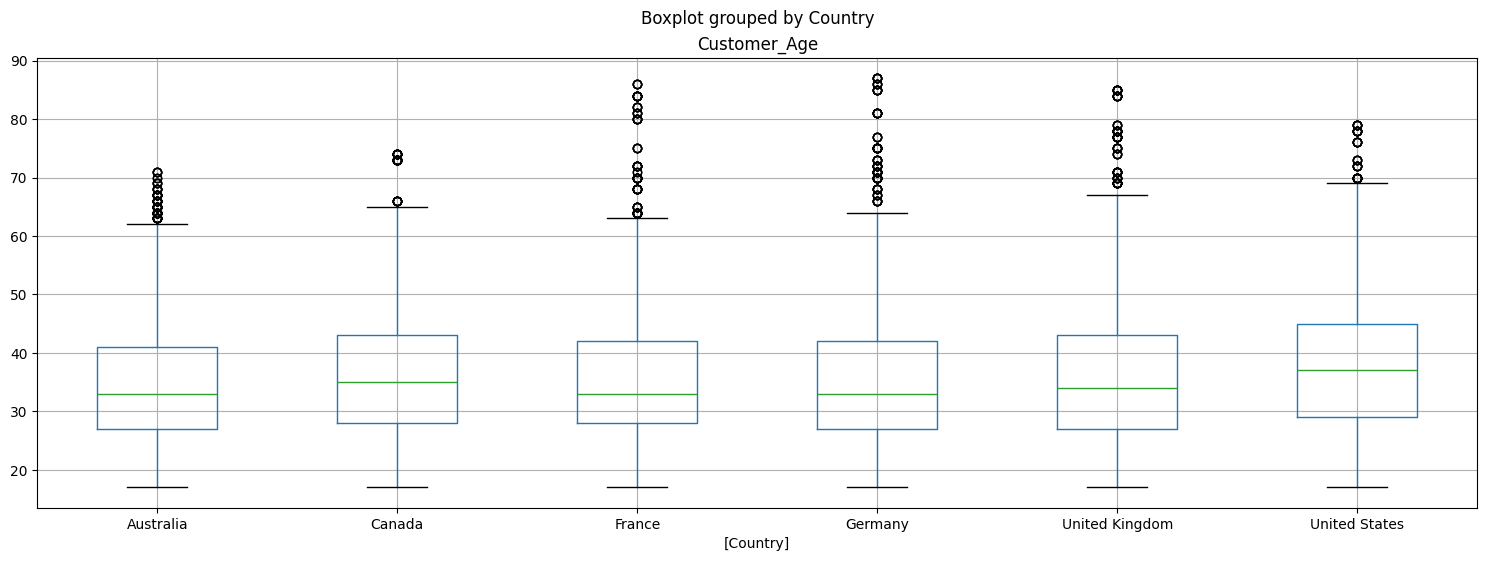

In [54]:
data[['Customer_Age','Country']].boxplot(by='Country',figsize=(18,6))

<Axes: xlabel='Order_Quantity', ylabel='Profit'>

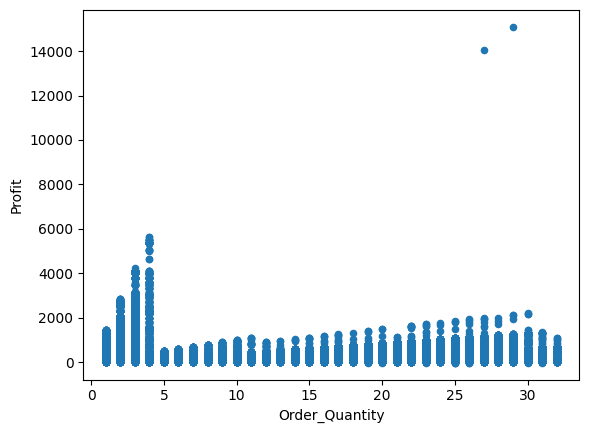

In [67]:
data.plot(kind='scatter',x='Order_Quantity',y='Profit')

In [72]:
data['Calculated_Age']= data[['Date','Year','Month']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
data['Calculated_Age'].head()

C:\Users\babur\AppData\Local\Temp\ipykernel_7096\3505799238.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Calculated_Age']= data[['Date','Year','Month']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)


0    2013-11-26 00:00:00-2013-November
1    2015-11-26 00:00:00-2015-November
2       2014-03-23 00:00:00-2014-March
3       2016-03-23 00:00:00-2016-March
4         2014-05-15 00:00:00-2014-May
Name: Calculated_Age, dtype: object

How many orders were made in Canada or France


In [77]:
data.loc[(data['Country']=='Canada')|(data['Country']=='France')].shape[0]

25176

How many Bike racks were purchased fom Canada


In [79]:
data.loc[(data['Country']=='Canada')&(data['Sub_Category']=='Bike Racks')].shape[0]

104

How many orders were made in each region (state) of France?Also plot a bar graph of the same

<Axes: xlabel='State'>

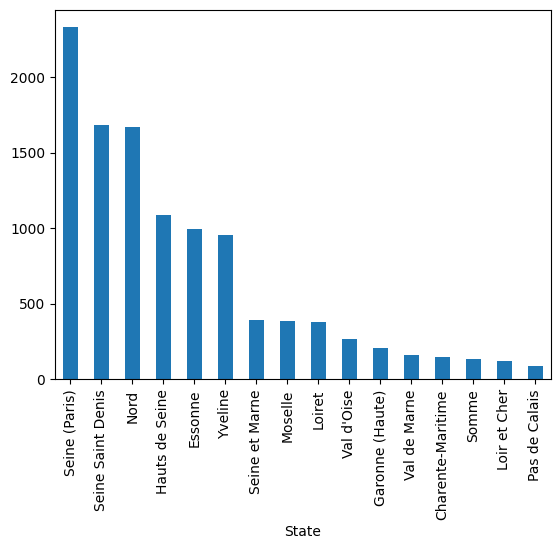

In [83]:
data.loc[data['Country']=='France','State'].value_counts().plot(kind='bar')

Which gender has most amount of sale?

In [85]:
data.head()
data['Customer_Gender'].value_counts()

Customer_Gender
M    58312
F    54724
Name: count, dtype: int64

<Axes: xlabel='Customer_Gender'>

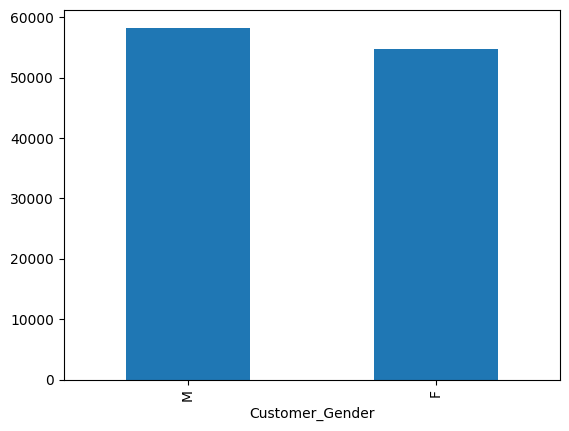

In [86]:
data['Customer_Gender'].value_counts().plot(kind='bar')

How many sales with more than 500 in revenue is made by men

In [92]:
data.loc[(data['Customer_Gender'] == 'M') & (data['Revenue']>500)].shape[0]

21773

Get the top 5 sales with highest revenue

In [94]:
data.sort_values(['Revenue'],ascending = False).head(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Age
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24 00:00:00-2015-July
112072,2013-07-24,24,July,2013,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",27,1482,2384,14055,40014,54069,2013-07-24 00:00:00-2013-July
71129,2011-07-08,8,July,2011,22,Youth (<25),M,Canada,Alberta,Bikes,Road Bikes,"Road-150 Red, 48",4,2171,3578,5628,8684,14312,2011-07-08 00:00:00-2011-July
70597,2011-05-12,12,May,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-05-12 00:00:00-2011-May
70601,2011-09-30,30,September,2011,19,Youth (<25),F,Canada,British Columbia,Bikes,Road Bikes,"Road-150 Red, 62",4,2171,3578,5485,8684,14169,2011-09-30 00:00:00-2011-September


Get the sale with the highest revenue


In [127]:
data.sort_values(['Revenue'],ascending=False).head(1)  #1

cond = data['Revenue'] == data['Revenue'].max()

data.loc[cond]  #2

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,Calculated_Age
112073,2015-07-24,24,July,2015,52,Adults (35-64),M,Australia,Queensland,Clothing,Vests,"Touring-1000 Yellow, 50",29,1482,2384,15096,42978,58074,2015-07-24 00:00:00-2015-July


What is the mean Order_Quantity of orders with more than 10K in revenue?

In [133]:
data.loc[data['Revenue'] > 10000]['Order_Quantity'].mean()


np.float64(3.7218934911242605)

How many orders were made in May of 2016?


In [144]:
data.loc[(data['Year']==2016)&(data['Month']=='May')].shape[0]

5015

How many orders were made between May and July of 2016?


In [151]:
data.loc[(data['Month'].isin(['June','July','May']))].shape[0]

29824

Show a grouped box plot per month with the profit values.

<Axes: title={'center': 'Profit'}, xlabel='[Month]'>

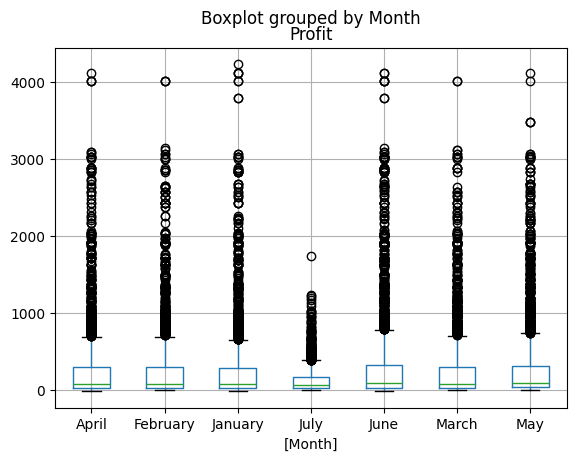

In [153]:
data.loc[data['Year'] == 2016, ['Profit', 'Month']].boxplot(by='Month')

